In [28]:
!pip install xgboost


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
columns = ["id", "clump_thickness", "uniformity_cell_size", "uniformity_cell_shape",
           "marginal_adhesion", "single_epithelial_cell_size", "bare_nuclei",
           "bland_chromatin", "normal_nucleoli", "mitoses", "class"]
data = pd.read_csv(url, names=columns)


In [31]:
data.head(20)

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_cell_size         699 non-null    int64 
 3   uniformity_cell_shape        699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [33]:
data.describe()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [34]:
print(data['bare_nuclei'].unique())


['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [35]:
data['bare_nuclei'] = pd.to_numeric(data['bare_nuclei'], errors='coerce')


In [36]:
data = data.dropna()


In [37]:
data

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           683 non-null    int64  
 1   clump_thickness              683 non-null    int64  
 2   uniformity_cell_size         683 non-null    int64  
 3   uniformity_cell_shape        683 non-null    int64  
 4   marginal_adhesion            683 non-null    int64  
 5   single_epithelial_cell_size  683 non-null    int64  
 6   bare_nuclei                  683 non-null    float64
 7   bland_chromatin              683 non-null    int64  
 8   normal_nucleoli              683 non-null    int64  
 9   mitoses                      683 non-null    int64  
 10  class                        683 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


# **Feature and Label Preparation**

In [39]:
X = data.drop(['id', 'class'], axis=1)
y = data['class'].map({2: 0, 4: 1})  # 0 = benign, 1 = malignant


# **Normalize or Scale Features**

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#**Train Test Split**

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# **Train SVM and Evaluate**

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        79
           1       0.96      0.95      0.96        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

[[77  2]
 [ 3 55]]


# **Optimize SVM Hyperparameters**

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
y_pred_optimized = grid.predict(X_test)
print(classification_report(y_test, y_pred_optimized))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.00

# **Comparing with Logistic Regression , XGBoost , Random Forest**

In [44]:
import matplotlib.pyplot as plt

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store accuracy results
accuracy_scores = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    # Print detailed results
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

Confusion Matrix:
[[78  1]
 [ 5 53]]
Accuracy: 0.9562

Random Forest Results:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        79
           1       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137

Confusion Matrix:
[[78  1]
 [ 6 52]]
Accuracy: 0.9489

XGBoost Results:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        79
           1       0.96      0.90      0.93        58

  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:07:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

Confusion Matrix:
[[78  1]
 [ 5 53]]
Accuracy: 0.9562

Random Forest Results:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        79
           1       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137

Confusion Matrix:
[[78  1]
 [ 6 52]]
Accuracy: 0.9489


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:07:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        79
           1       0.96      0.90      0.93        58

    accuracy                           0.94       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137

Confusion Matrix:
[[77  2]
 [ 6 52]]
Accuracy: 0.9416

SVM Results:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        79
           1       0.96      0.95      0.96        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

Confusion Matrix:
[[77  2]
 [ 3 55]]
Accuracy: 0.9635


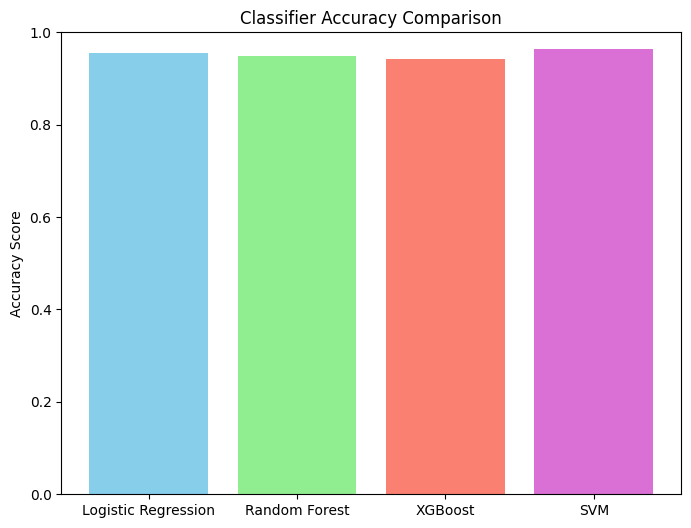

In [45]:
from sklearn.svm import SVC

models['SVM'] = SVC(kernel='rbf', random_state=42)

# Re-run the same training and evaluation loop
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")

# Plotting the extended set of models
plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['skyblue', 'lightgreen', 'salmon', 'orchid'])
plt.ylabel('Accuracy Score')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
